# Project l’impact des aliment sur l’environnement, de la production à la mise en vente

In [1]:
import pandas as pd
import projet_craber as craber
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# faire scrapping de la page web
# # appel la fonction craber
# l_pages = ["agribalyse-31-detail-par-ingredient","agribalyse-31-detail-par-etape","agribalyse-31-synthese"]
# for i in range(3):
#     craber.main(l_pages[i])

In [2]:
df_ing = pd.read_csv("agribalyse-31-detail-par-ingredient.csv")
df_eta = pd.read_csv("agribalyse-31-detail-par-etape.csv")
df_syn = pd.read_csv("agribalyse-31-synthese.csv")

In [ ]:
df_ing.head(3)


,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Score unique EF,Changement climatique,Appauvrissement de la couche d'ozone,...,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,id,i,rand
0,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Fromage frais crémeux,0.161214,1.562306,4.428399e-08,...,0.005404,0.072064,17.040700,86.028631,0.305351,7.917968,0.000015,6zSO8QZaML-gN4W6DRILO,1,634341
1,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Autres étapes,0.056367,0.398199,5.949539e-08,...,0.001300,0.006976,2.200858,8.965358,0.144032,15.269280,0.000002,Xa1ULHT-5G-7fmqqDJ2d6,2,63693
2,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Huile d'olive,0.047563,0.060536,1.763030e-08,...,0.001739,0.015762,5.545326,57.072861,1.944940,1.720683,0.000002,9co8Qv-7obb3ka7DDQS6R,3,600130


In [ ]:
df_eta.head()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Score unique EF - Agriculture,Score unique EF - Transformation,Score unique EF - Emballage,Score unique EF - Transport,...,Épuisement des ressources minéraux - Supermarché et distribution,Épuisement des ressources minéraux - Consommation,DQR - Global,DQR - P,DQR - TiR,DQR - GR,DQR - TeR,id,i,rand
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",0.650633,0.499682,0.024315,0.046064,...,4.603375e-07,2.009424e-09,2.99,3.51,1.32,4.33,2.79,vG FJ0L-DcZBFCJ19PC0R,1,818590
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",0.033498,0.000000,0.050344,0.015192,...,4.396778e-07,0.000000e+00,4.11,4.27,4.39,2.79,5.00,2ONZSShMmBKTvtLU-EdE1,2,875314
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",0.041872,0.000000,0.000000,0.013993,...,5.495973e-07,1.624284e-08,3.54,2.74,4.28,2.80,4.34,RYfLdW24a3XLqz QK2TAS,3,355320
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",0.082777,0.000000,0.027078,0.012938,...,5.495973e-07,1.624284e-08,3.75,2.74,3.62,4.33,4.33,zcLu-6l27FFCWZHzwPQoK,4,7565
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",0.650633,0.499682,0.024315,0.046064,...,4.603375e-07,2.009424e-09,2.99,3.51,1.32,4.33,2.79,AGxCY3vI3nCSaXCvIQp1F,5,938918


In [ ]:
df_syn.head(3)

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,id,i,rand
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,False,Ambiant (long),LDPE,...,0.013280,0.127350,43.368466,24.699395,3.079121,315.057170,0.000088,Ctg28H2NpEzvxsBYRK5ls,1,813363
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,False,Ambiant (long),Verre,...,0.002379,0.012785,5.672531,20.508995,2.585763,12.701604,0.000007,XjV5Nz2SOQ SDULQa1alk,2,327490
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,False,Ambiant (long),Pas d'emballage,...,0.002197,0.006394,4.064650,18.871203,3.104146,6.275385,0.000004,cOeZvVMs9WbIeOa45P EQ,3,676029


## Pretraitement des données 

In [3]:
# selection toutes les colonne sauf les colonnes 
liste = (df_eta.columns).to_list()
col_eta = [liste[1]] + liste[6:18] + liste[42:54] + liste[78:84]
col_eta

['Code CIQUAL',
 'Score unique EF - Agriculture',
 'Score unique EF - Transformation',
 'Score unique EF - Emballage',
 'Score unique EF - Transport',
 'Score unique EF - Supermarché et distribution',
 'Score unique EF - Consommation',
 'Changement climatique - Agriculture',
 'Changement climatique - Transformation',
 'Changement climatique - Emballage',
 'Changement climatique - Transport',
 'Changement climatique - Supermarché et distribution',
 'Changement climatique - Consommation',
 'Effets toxicologiques sur la santé humaine   substances non-cancérogènes - Agriculture',
 'Effets toxicologiques sur la santé humaine   substances non-cancérogènes - Transformation',
 'Effets toxicologiques sur la santé humaine   substances non-cancérogènes - Emballage',
 'Effets toxicologiques sur la santé humaine   substances non-cancérogènes - Transport',
 'Effets toxicologiques sur la santé humaine   substances non-cancérogènes - Supermarché et distribution',
 'Effets toxicologiques sur la santé h

a) Selection des colonnes pertinentes pour l'analyse

In [4]:
col_syn = ['Code CIQUAL', 'Sous-groupe d\'aliment',
       'Nom du Produit en Français','Matériau d\'emballage','DQR',
       'Score unique EF', 'Changement climatique',
       'Effets toxicologiques sur la santé humaine   substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine   substances cancérogènes',
       'Écotoxicité pour écosystèmes aquatiques d\'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux']

In [5]:
# Selection des colonnes pertinentes pour l'analyse
df_synt = df_syn[col_syn]
df_etape = df_eta[col_eta]


b) Suppression des doublons et des valeurs manquantes

In [6]:
df_synt = df_synt.drop_duplicates(subset=['Code CIQUAL'], keep='first')
df_etape = df_etape.drop_duplicates(subset=['Code CIQUAL'], keep='first')

c) Fusion des tables pour une analyse plus complète

In [7]:
df_fusion = pd.merge(df_synt, df_etape, on='Code CIQUAL', how='inner')
df_fusion.shape

(2487, 44)

In [8]:
# remplissage des valeurs nulles
# 预处理：填充空值
float_columns = df_fusion.select_dtypes(include='float64').columns

# Traversée la data frame, remplissez les valeurs nulles comme moyenne
# 遍历浮点列，将空值填充为平均值
for column in float_columns:
    mean_value = df_fusion[column].mean()
    df_fusion[column].fillna(mean_value, inplace=True)

# supprimer les lignes avec des strings vide
# 删除有空str的行
df_fusion.dropna(inplace=True)


# Conserver les valeurs dans l'intervalle de confiance à 95%
# 预处理：DQR取95%置信区间

# Définir un seuil de 1.96 écarts types (intervalle de confiance à 95 %)
# 定义阈值为1.96倍标准差（95%置信区间）
threshold = 1.96

# Calculer la moyenne et l'écart type
# 计算均值和标准差
mean = np.mean(df_fusion['DQR'])
std = np.std(df_fusion['DQR'])

# Calculer les bornes inférieur et supérieur
# 计算下限和上限阈值
lower_bound = mean - threshold * std

# Supprimer les valeurs en dehors de l'intervalle de confiance
# 删除超出置信区间的值
data_synthese = df_fusion[(df_fusion['DQR'] >= lower_bound)].copy()

# Prétraitement : les points abnormales et les valeurs aberrantes
# 离群点和异常值

# Définir un seuil de 3 écarts types
# 定义阈值为3倍标准差
threshold = 3

# Stocker les noms de la colonne avec la type float
# 获取浮点类型列的列名
float_columns = data_synthese.select_dtypes(include='float64').columns
float_columns = float_columns.drop('Score unique EF 3.1', errors='ignore')

# Parcourir les colonnes et modifier les données dépassant le seuil
# 遍历列，将超出阈值的数据改为阈值
for column in float_columns:
    mean = data_synthese[column].mean()
    std = data_synthese[column].std()

    # Calculer les bornes inférieur et supérieur
    # 计算下限和上限阈值
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # Remplacer les données dépassant par le seuil
    # 将超出阈值的数据改为阈值
    data_synthese[column] = np.where(data_synthese[column] < lower_bound, lower_bound, data_synthese[column])
    data_synthese[column] = np.where(data_synthese[column] > upper_bound, upper_bound, data_synthese[column])

In [9]:
data_synthese.shape

(2466, 44)

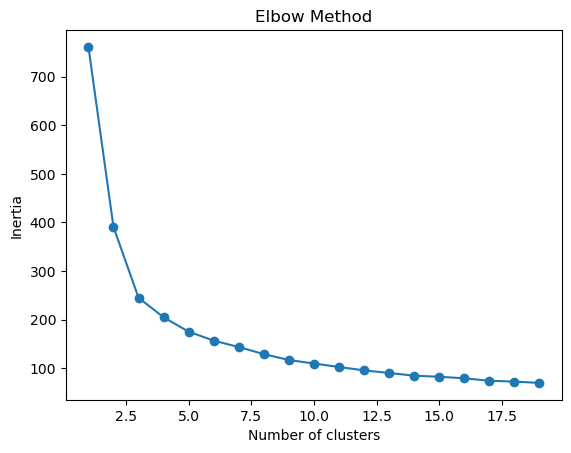

In [16]:
from warnings import filterwarnings
filterwarnings('ignore')
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_normalized)
    # inertia method returns wcss for that model
    # Inertia: It is the sum of squared distances of samples to their closest cluster center.
    inertia.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 20), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

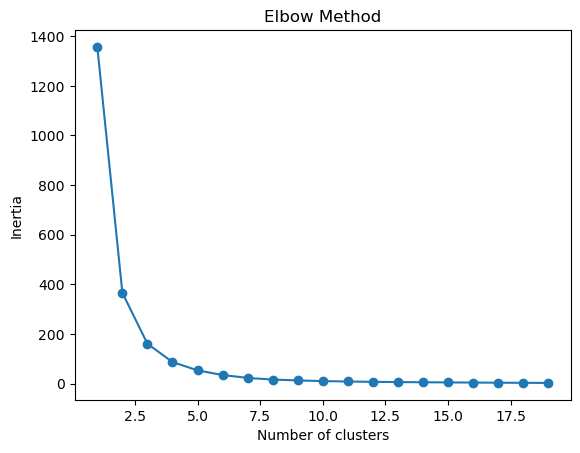

In [17]:
filterwarnings('ignore')
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_synthese['Score unique EF'].values.reshape(-1, 1))
    # inertia method returns wcss for that model
    # Inertia: It is the sum of squared distances of samples to their closest cluster center.
    inertia.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 20), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

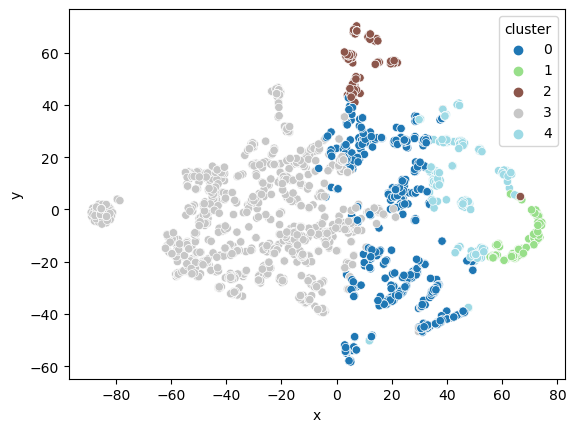

In [15]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

tab20 = sns.color_palette("tab20", as_cmap=True)

tsne = TSNE()
tsne_data = tsne.fit_transform(data_normalized)

# #utliser cross validation pour trouver le meilleur nombre de cluster
# from sklearn.model_selection import cross_val_score
# scores = []
# for i in range(2,10):
#     km = KMeans(n_clusters=i)
#     score = cross_val_score(km,data_normalized,cv=5)
#     scores.append(score.mean())

km = KMeans(n_clusters=5)
pred = km.fit_predict(data_normalized)

#afficher avec des couleur et des legendes
df = pd.DataFrame(tsne_data,columns=["x","y"])
df["cluster"] = pred
sns.scatterplot(data=df,x="x",y="y",hue="cluster",palette=tab20)
plt.show()

In [18]:
# Créer une novelle colonne pour stocker les labels
data_normalized = pd.DataFrame(data_normalized)
data_normalized['label'] = pd.Series(pred)
print(data_normalized.shape)
# modifier les noms des colonnes
data_normalized.columns = colonnes_selectionnees + ['label']
print(data_normalized["label"].value_counts())
data_normalized.head(10)


(2466, 9)
3    1291
0     655
4     247
2     142
1     131
Name: label, dtype: int64


,Changement climatique,Effets toxicologiques sur la santé humaine substances non-cancérogènes,Effets toxicologiques sur la santé humaine substances cancérogènes,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,label
0,0.240032,0.098643,0.347912,0.175639,0.028815,0.482345,1.000000,0.584150,2
1,0.025451,0.017414,0.021744,0.020612,0.027010,0.478164,0.052019,0.040516,3
2,0.011413,0.010618,0.013012,0.013999,0.026305,0.482557,0.021606,0.021188,3
3,0.027711,0.018382,0.030505,0.020046,0.033805,0.501083,0.051316,0.027959,3
4,0.240032,0.098643,0.347912,0.175639,0.028815,0.482345,1.000000,0.584150,2
5,0.233409,0.097397,0.341506,0.172986,0.028605,0.482316,1.000000,0.582092,2
6,0.068765,0.057962,0.070436,0.076415,0.059083,0.460060,0.101645,0.109033,3
7,0.024306,0.078501,0.053877,0.037899,0.045657,0.488986,0.093079,0.042729,3
8,0.027711,0.018382,0.030505,0.020046,0.033805,0.501083,0.051316,0.027959,3
9,0.054044,0.067991,0.107910,0.071322,0.077674,0.624921,0.080037,0.092417,3


In [34]:
# Spliter les donnees en train et test
from sklearn.model_selection import train_test_split
X = data_normalized.drop('label', axis=1)
y = data_normalized['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(1972, 8) (494, 8) (1972,) (494,)


### Utiliser les models de classification pour prédire les labels

In [35]:
# regression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_LR, X, y, cv=5)
print(f"Cross validation scores: {scores}")
print(f"Mean cross validation score: {scores.mean()}")

Accuracy: 0.9534412955465587
Cross validation scores: [0.90890688 0.96957404 0.97363083 0.95740365 0.97971602]
Mean cross validation score: 0.957846285240328


In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# cross validation
scores = cross_val_score(model_RF, X, y, cv=5)
print(f"Cross validation scores: {scores}")
print(f"Mean cross validation score: {scores.mean()}")


Accuracy: 0.9878542510121457
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       131
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00       259
           4       1.00      0.90      0.95        50

    accuracy                           0.99       494
   macro avg       0.99      0.98      0.98       494
weighted avg       0.99      0.99      0.99       494

Cross validation scores: [0.94331984 0.95537525 0.98985801 0.93509128 0.96146045]
Mean cross validation score: 0.9570209655829384


In [54]:
# SVM
from sklearn.svm import SVC
model_SVM = SVC(kernel='rbf')
model_SVM.fit(X_train, y_train)
y_pred = model_SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# cross validation
scores = cross_val_score(model_SVM, X, y, cv=5)
print(f"Cross validation scores: {scores}")
print(f"Mean cross validation score: {scores.mean()}")

Accuracy: 0.9838056680161943
Cross validation scores: [0.9534413  0.97768763 0.98580122 0.95537525 0.99188641]
Mean cross validation score: 0.9728383605291899


In [61]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 3)
model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# cross validation
model_KNN = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(model_KNN, X, y, cv=10)
print(f"Cross validation scores: {scores}")
print(f"Mean cross validation score: {scores.mean()}")

Accuracy: 0.979757085020243
Cross validation scores: [0.93927126 0.93927126 0.91093117 0.9757085  0.98785425 0.97165992
 0.94715447 0.92682927 0.9796748  0.95528455]
Mean cross validation score: 0.9533639445706198


In [36]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9696356275303644


In [49]:
# MLP  
# Creer un modele MLP avec 2 couches cachées de 100 et 50 neurones en utilisant pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(8, 200)
        self.fc2 = nn.Linear(200, 100)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        #x = torch.sigmoid(self.fc2(x))
        #x = torch.relu(self.fc2(x))
        x = self.fc2(x)

        return x
    
model = MLP()
# On utilise la cross entropy loss pour les problèmes de classification
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)  # Convert DataFrame to numpy array
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Convert DataFrame to numpy array
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)  # Convert DataFrame to numpy array
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)  # Convert DataFrame to numpy array
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32)



for epoch in range(10):
    model.train()
    for i, (X_batch, y_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        loss = criterion(y_pred, y_test_tensor)
        # y_pred est un tensor de probabilités, on prend l'indice de la classe avec la probabilité la plus élevée
        y_pred = y_pred.argmax(dim=1)
        print('Epoch:', epoch, 'Validation loss:', loss.item(), 'Validation accuracy:', accuracy_score(y_test, y_pred))

Epoch: 0 Validation loss: 4.302712440490723 Validation accuracy: 0.7125506072874493
Epoch: 1 Validation loss: 4.0348920822143555 Validation accuracy: 0.5910931174089069
Epoch: 2 Validation loss: 3.946436643600464 Validation accuracy: 0.7469635627530364
Epoch: 3 Validation loss: 3.8636891841888428 Validation accuracy: 0.8805668016194332
Epoch: 4 Validation loss: 3.819995403289795 Validation accuracy: 0.917004048582996
Epoch: 5 Validation loss: 3.7914342880249023 Validation accuracy: 0.9190283400809717
Epoch: 6 Validation loss: 3.776581048965454 Validation accuracy: 0.9149797570850202
Epoch: 7 Validation loss: 3.7632369995117188 Validation accuracy: 0.9331983805668016
Epoch: 8 Validation loss: 3.753603219985962 Validation accuracy: 0.9352226720647774
Epoch: 9 Validation loss: 3.7483673095703125 Validation accuracy: 0.9392712550607287


## Partie exploratoire des données

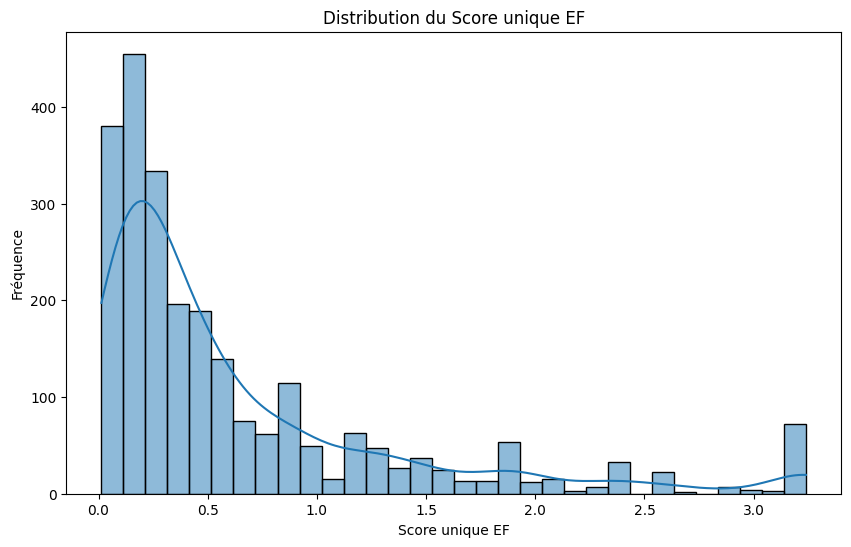

In [13]:
# Histogramme du 'Score unique EF'
plt.figure(figsize=(10, 6))
sns.histplot(data_synthese['Score unique EF'], kde=True)
plt.title('Distribution du Score unique EF')
plt.xlabel('Score unique EF')
plt.ylabel('Fréquence')
plt.show()



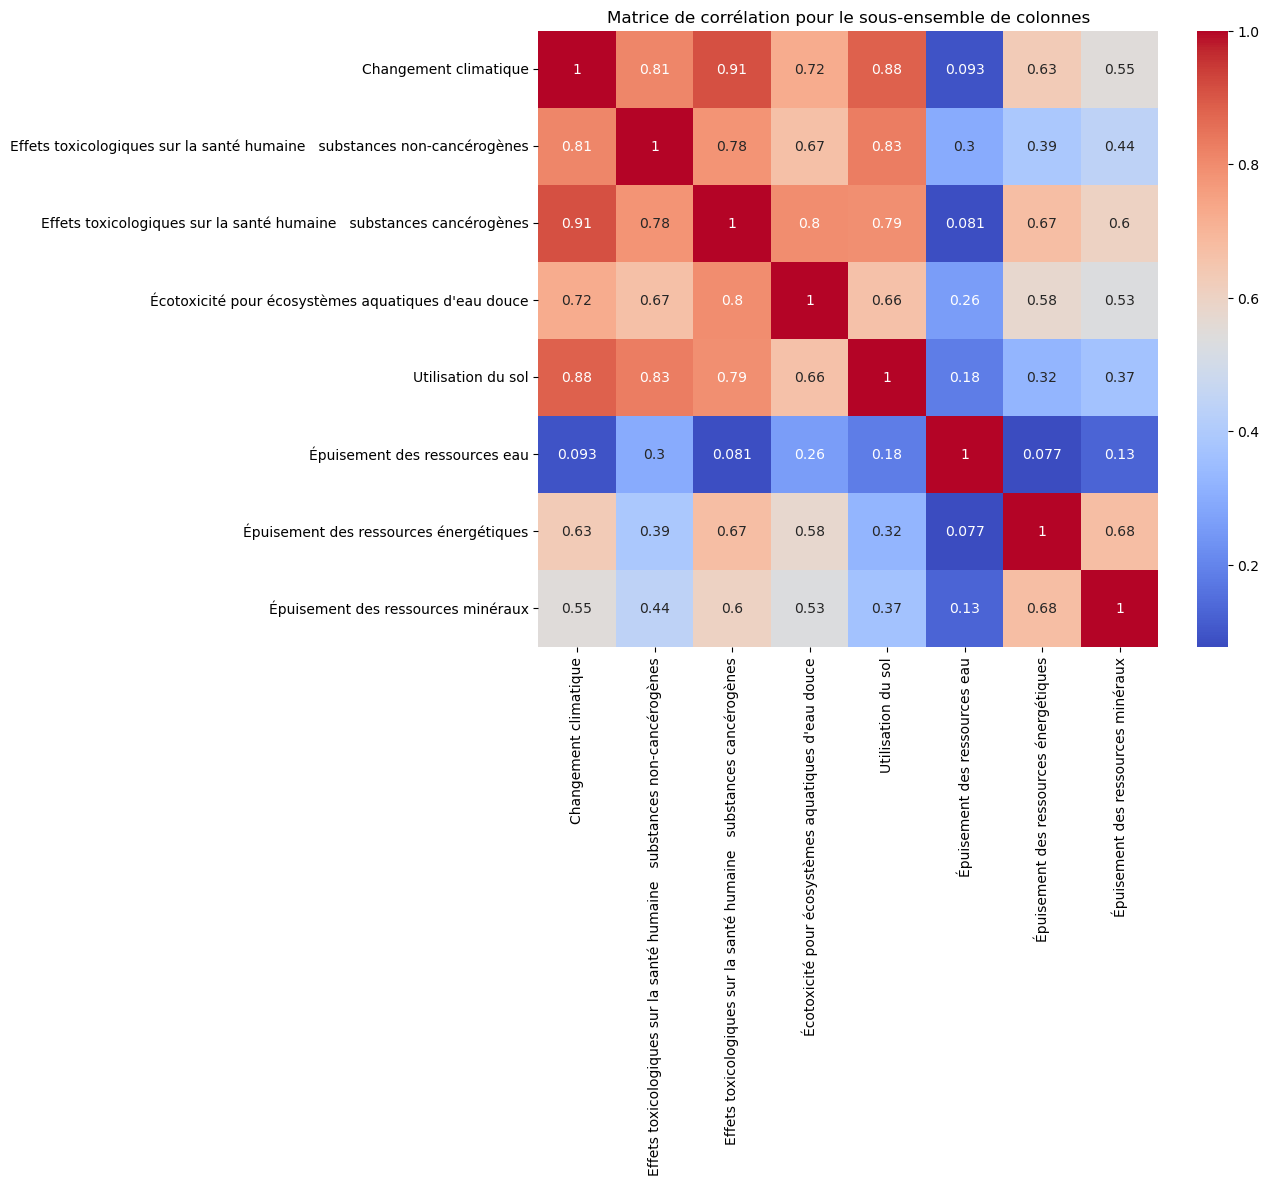

In [11]:
# Sélection de sous-ensemble de colonnes pour la corrélation
colonnes_selectionnees = ['Changement climatique',
       'Effets toxicologiques sur la santé humaine   substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine   substances cancérogènes',
       'Écotoxicité pour écosystèmes aquatiques d\'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux']  

df_subset = data_synthese[colonnes_selectionnees]

# Matrice de corrélation pour le sous-ensemble
correlation_matrix_subset = df_subset.corr()

# Heatmap des corrélations pour le sous-ensemble
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation pour le sous-ensemble de colonnes')
plt.show()

<AxesSubplot: title={'center': 'Score unique EF'}, xlabel="Sous-groupe d'aliment">

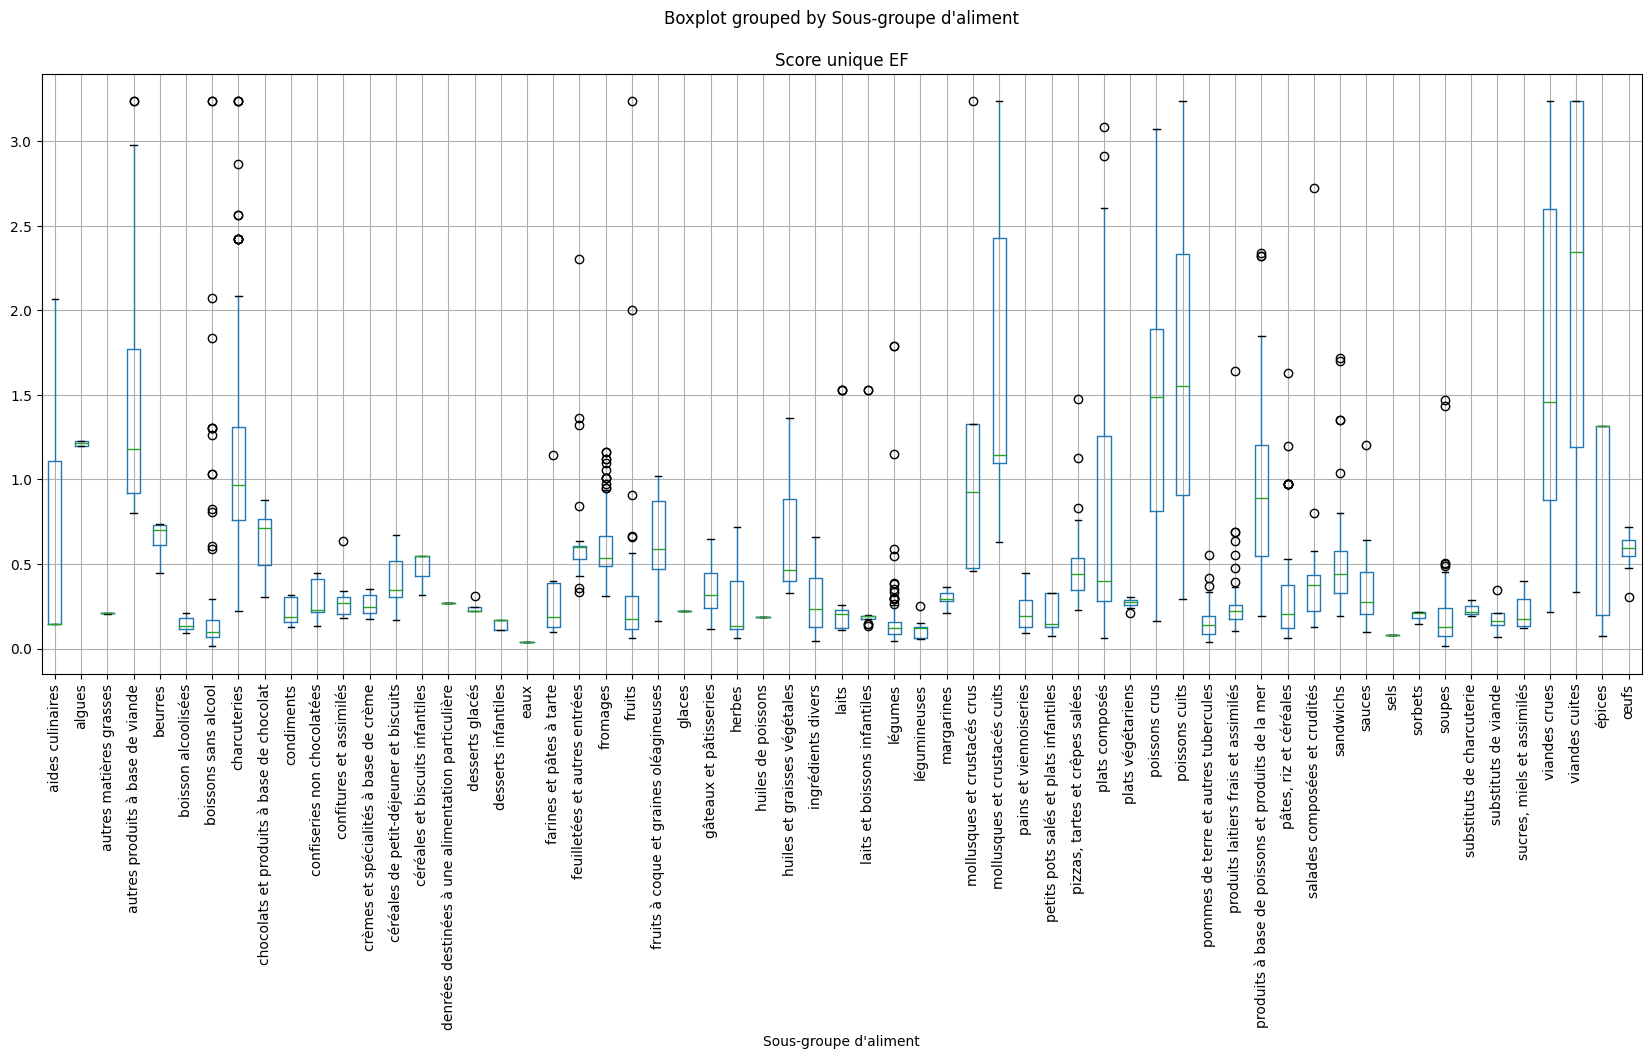

In [15]:
data_synthese.boxplot(column = "Score unique EF", by = "Sous-groupe d'aliment", figsize=(20, 8), rot=90)

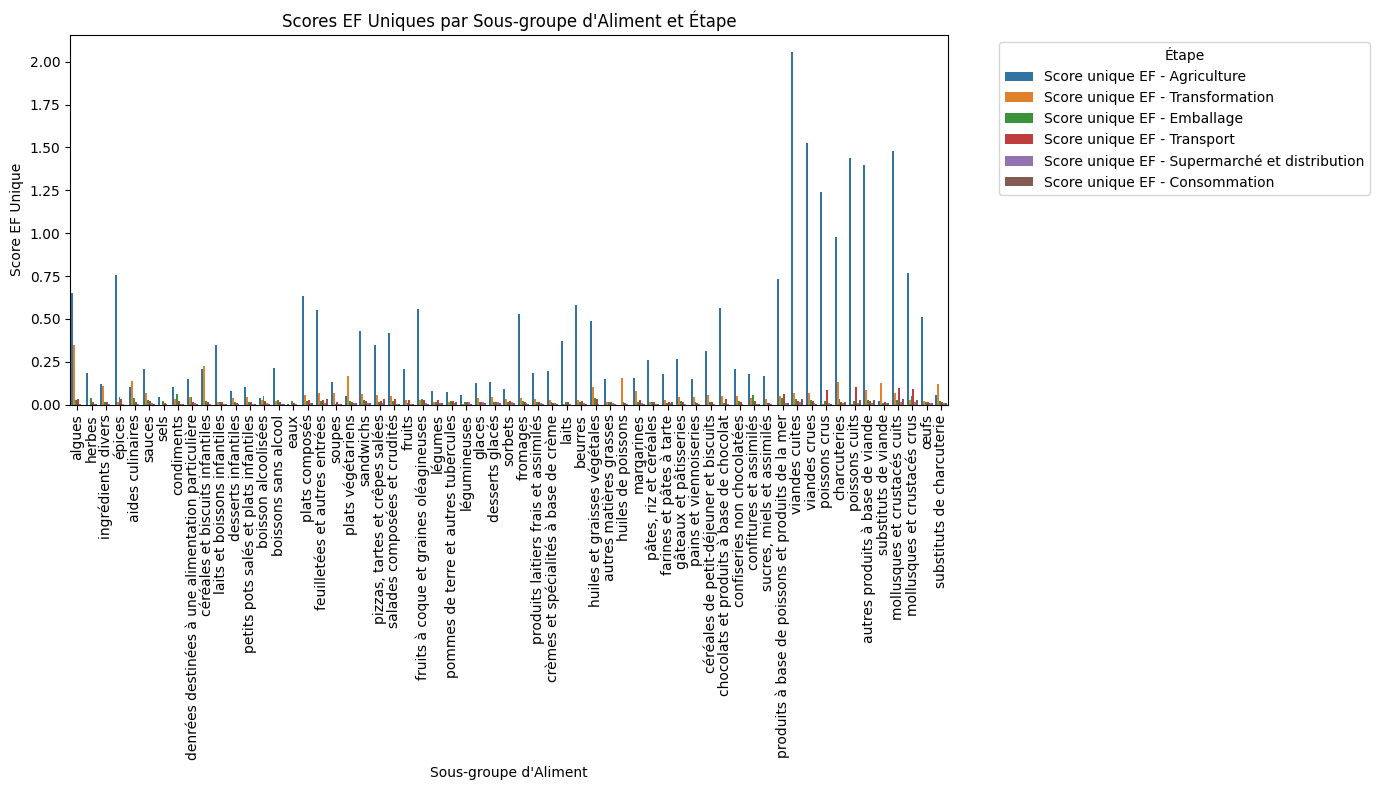

In [16]:
df_scores = data_synthese[[
    'Sous-groupe d\'aliment', 
    'Score unique EF - Agriculture',
    'Score unique EF - Transformation',
    'Score unique EF - Emballage',
    'Score unique EF - Transport',
    'Score unique EF - Supermarché et distribution',
    'Score unique EF - Consommation']]

# Préparation des données pour le diagramme à barres empilées
df_melted = df_scores.melt(id_vars='Sous-groupe d\'aliment', var_name='Étape', value_name='Score EF')

# Création du diagramme à barres empilées
plt.figure(figsize=(14, 8))
sns.barplot(x='Sous-groupe d\'aliment', y='Score EF', hue='Étape', data=df_melted, ci=None)

# Personnalisation du graphique
plt.title('Scores EF Uniques par Sous-groupe d\'Aliment et Étape')
plt.xlabel('Sous-groupe d\'Aliment')
plt.ylabel('Score EF Unique')
plt.xticks(rotation=90)
plt.legend(title='Étape', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichage du graphique
plt.tight_layout()
plt.show()


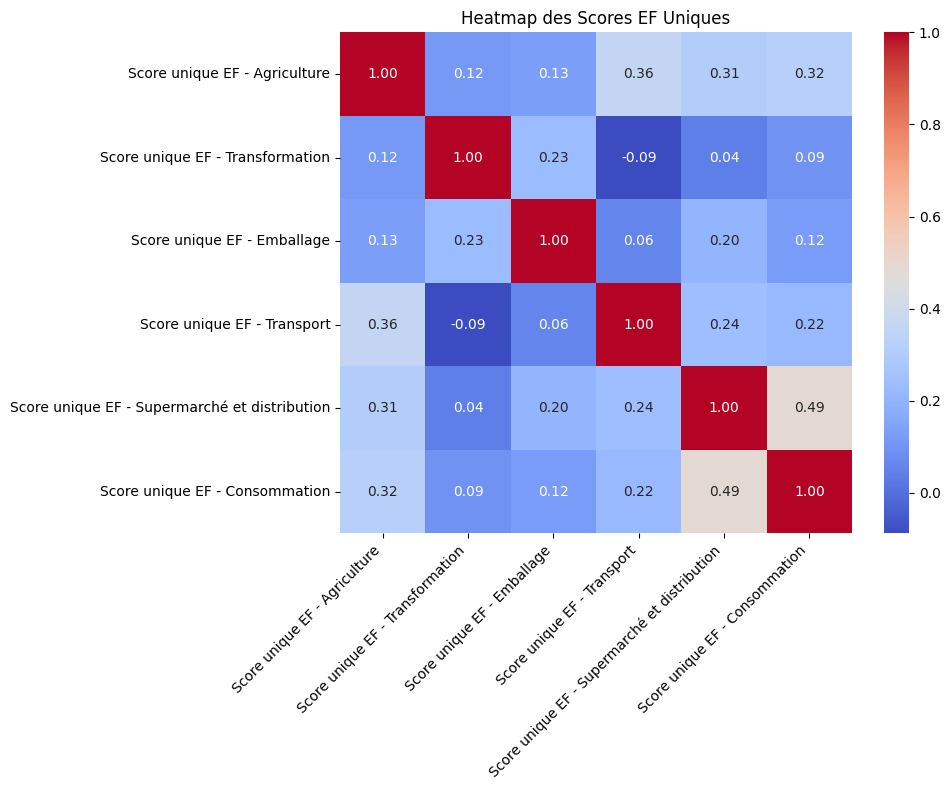

In [17]:
# Calcul de la matrice de corrélation
corr = df_scores.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Personnalisation du graphique
plt.title('Heatmap des Scores EF Uniques')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Affichage du graphique
plt.show()

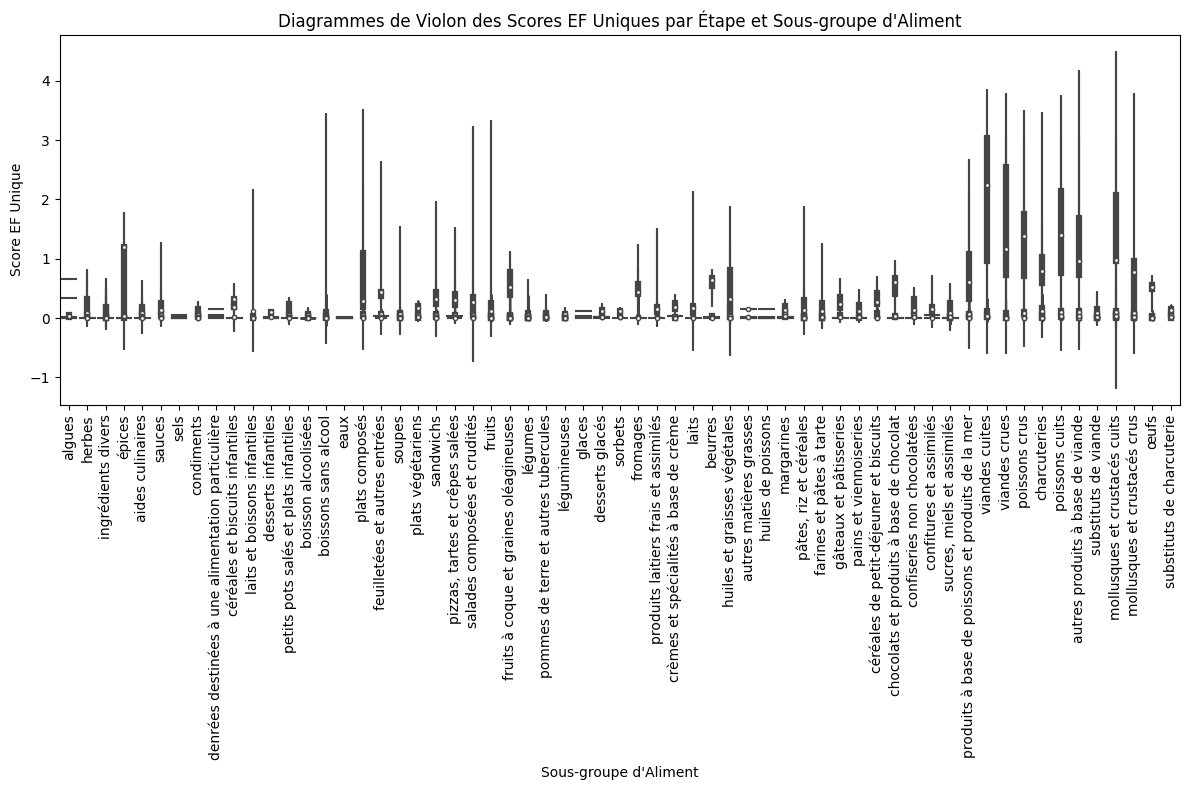

In [18]:
# Création des diagrammes de violon
plt.figure(figsize=(12, 8))
sns.violinplot(x='Sous-groupe d\'aliment', y='Score unique EF - Agriculture', data=df_scores)
sns.violinplot(x='Sous-groupe d\'aliment', y='Score unique EF - Transformation', data=df_scores)
sns.violinplot(x='Sous-groupe d\'aliment', y='Score unique EF - Emballage', data=df_scores)
sns.violinplot(x='Sous-groupe d\'aliment', y='Score unique EF - Transport', data=df_scores)
sns.violinplot(x='Sous-groupe d\'aliment', y='Score unique EF - Supermarché et distribution', data=df_scores)
sns.violinplot(x='Sous-groupe d\'aliment', y='Score unique EF - Consommation', data=df_scores)

# Personnalisation du graphique
plt.title('Diagrammes de Violon des Scores EF Uniques par Étape et Sous-groupe d\'Aliment')
plt.xlabel('Sous-groupe d\'Aliment')
plt.ylabel('Score EF Unique')
plt.xticks(rotation=90)

# Affichage du graphique
plt.tight_layout()
plt.show()


<Axes: >

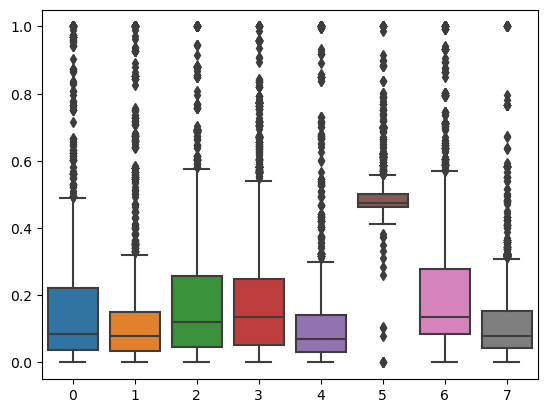

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_normalized = df_subset.copy()
data_normalized = scaler.fit_transform(data_normalized)
sns.boxplot(data_normalized)

In [20]:
def class_variance(df, target='Score unique EF'):
    inter_class_var = []
    intra_class_var = []

    for col in df.columns[:-1]:
        inter_class_var.append(df.groupby(target)[col].mean().var())
        intra_class_var.append(df.groupby(target)[col].var().mean())

    return np.array(inter_class_var), np.array(intra_class_var)

data_normalized = pd.DataFrame(data_normalized, columns=df_subset.columns)
data_normalized['Score unique EF'] = df_synt['Score unique EF']
inter_class_var, intra_class_var = class_variance(data_normalized)
print(f"Inter-class ascending variance: {inter_class_var.argsort()}")
print(f"Intra-class ascending variance: {intra_class_var.argsort()}")

Inter-class ascending variance: [5 7 6 4 2 3 1 0]
Intra-class ascending variance: [5 7 6 0 2 3 4 1]


In [21]:
def box_plot(df, target='target', cols=[]):
    fig, ax = plt.subplots(2, 4, figsize=(15, 5))
    for col in cols:
        sns.boxplot(x=target, y=col, data=df, ax=ax[cols.index(col) // 4, cols.index(col) % 4])
    plt.tight_layout()

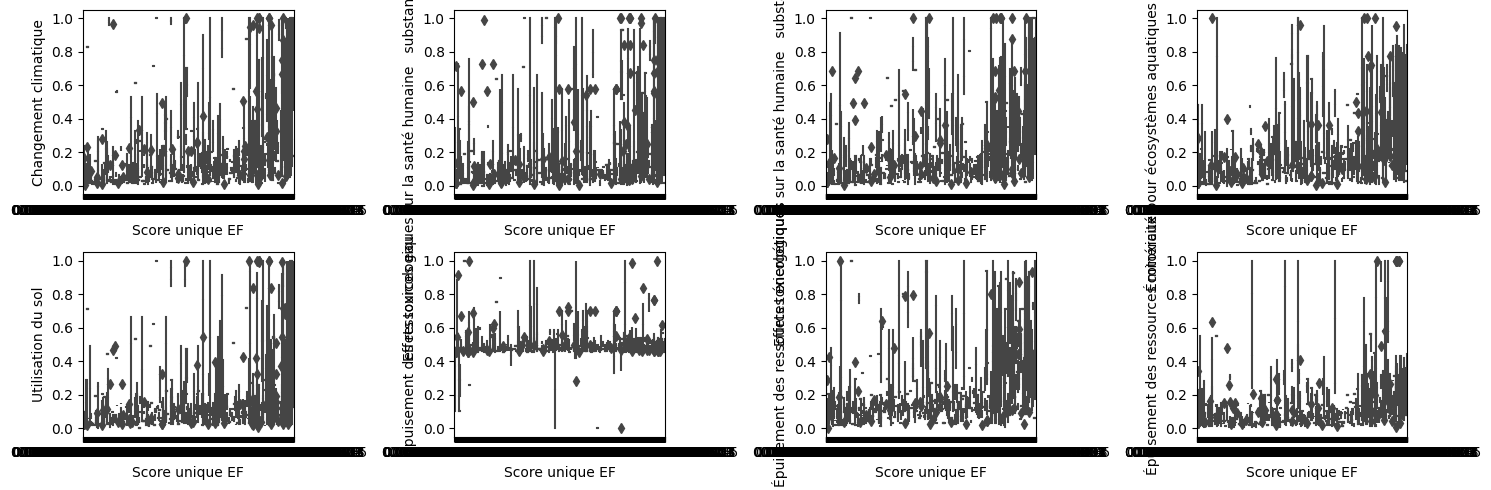

In [23]:
cols_list = list(data_normalized.columns[:-1])
box_plot(data_normalized, target='Score unique EF', cols=cols_list)

### Partie experimentale

In [ ]:
# treshold sur la colonne score unique EF
median_value = data_synthese['Score unique EF'].median()
labels = np.where(data_synthese['Score unique EF'] > median_value, 1, 0)

In [ ]:
print("valeurs 1" , len(labels[labels == 1]))
print("valeurs 0" , len(labels[labels == 0]))

valeurs 1 1230
valeurs 0 1236


Accuracy: 0.98 (+/- 0.02)
              precision    recall  f1-score   support

       faibe       0.98      0.96      0.97       264
        fort       0.96      0.98      0.97       230

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



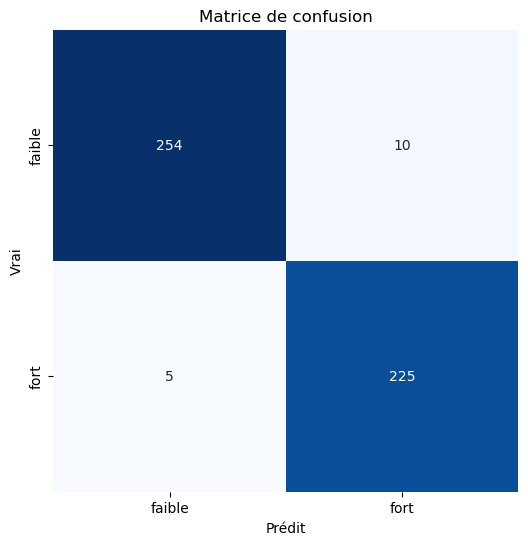

                                                     Coefficient
Changement climatique                               2.574490e+00
Effets toxicologiques sur la santé humaine   su...  2.309643e-08
Effets toxicologiques sur la santé humaine   su...  2.560044e-09
Écotoxicité pour écosystèmes aquatiques d'eau d...  3.975587e-02
Utilisation du sol                                  9.529413e-03
Épuisement des ressources eau                       3.416770e-01
Épuisement des ressources énergétiques              1.325983e-01
Épuisement des ressources minéraux                 -2.651306e-06


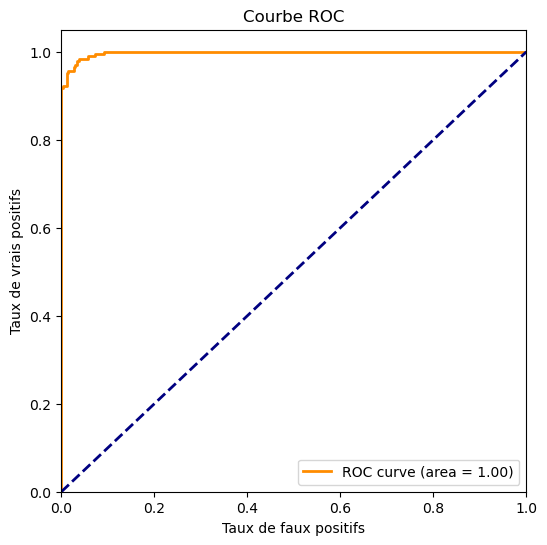

In [ ]:
# Regressions logistiques
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

# Séparation des données en variables explicatives et cible
X = data_synthese[colonnes_selectionnees]


# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)


# Création du modèle de régression logistique
model = LogisticRegression(max_iter=1000)

# Cross validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Affichage du rapport de classification
print(classification_report(y_test, y_pred, target_names=['faibe', 'fort']))

# Affichage de la matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Prédit')
ax.set_ylabel('Vrai')
ax.set_title('Matrice de confusion')
ax.xaxis.set_ticklabels(['faible', 'fort'])
ax.yaxis.set_ticklabels(['faible', 'fort'])
plt.show()

# Affichage des coefficients
coefficients = model.coef_[0]
coefficients = pd.DataFrame(coefficients, index=colonnes_selectionnees, columns=['Coefficient'])
print(coefficients)

#Courbe ROC
# Calcul des probabilités prédites
y_pred_proba = model.predict_proba(X_test)[:,1]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcul de l'aire sous la courbe ROC
auc = roc_auc_score(y_test, y_pred_proba)

# Création de la courbe ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


Score R2 : 0.9626190022901162
Erreur quadratique moyenne : 0.019124524516550688


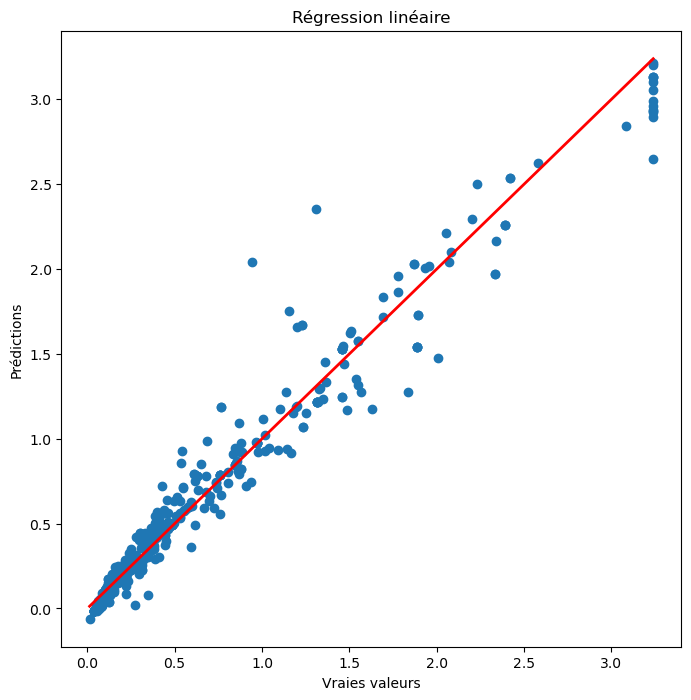

In [ ]:
# Linear regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Séparation des données en variables explicatives et cible
X = data_synthese[colonnes_selectionnees]
y = data_synthese['Score unique EF']

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Création du modèle de régression linéaire
model = LinearRegression()

# Cross validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Affichage du score R2
print('Score R2 :', model.score(X_test, y_test))

# Erreur quadratique moyenne
print('Erreur quadratique moyenne :', mean_squared_error(y_test, y_pred))


# Tracer la droite de régression
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.title('Régression linéaire')
plt.show()

